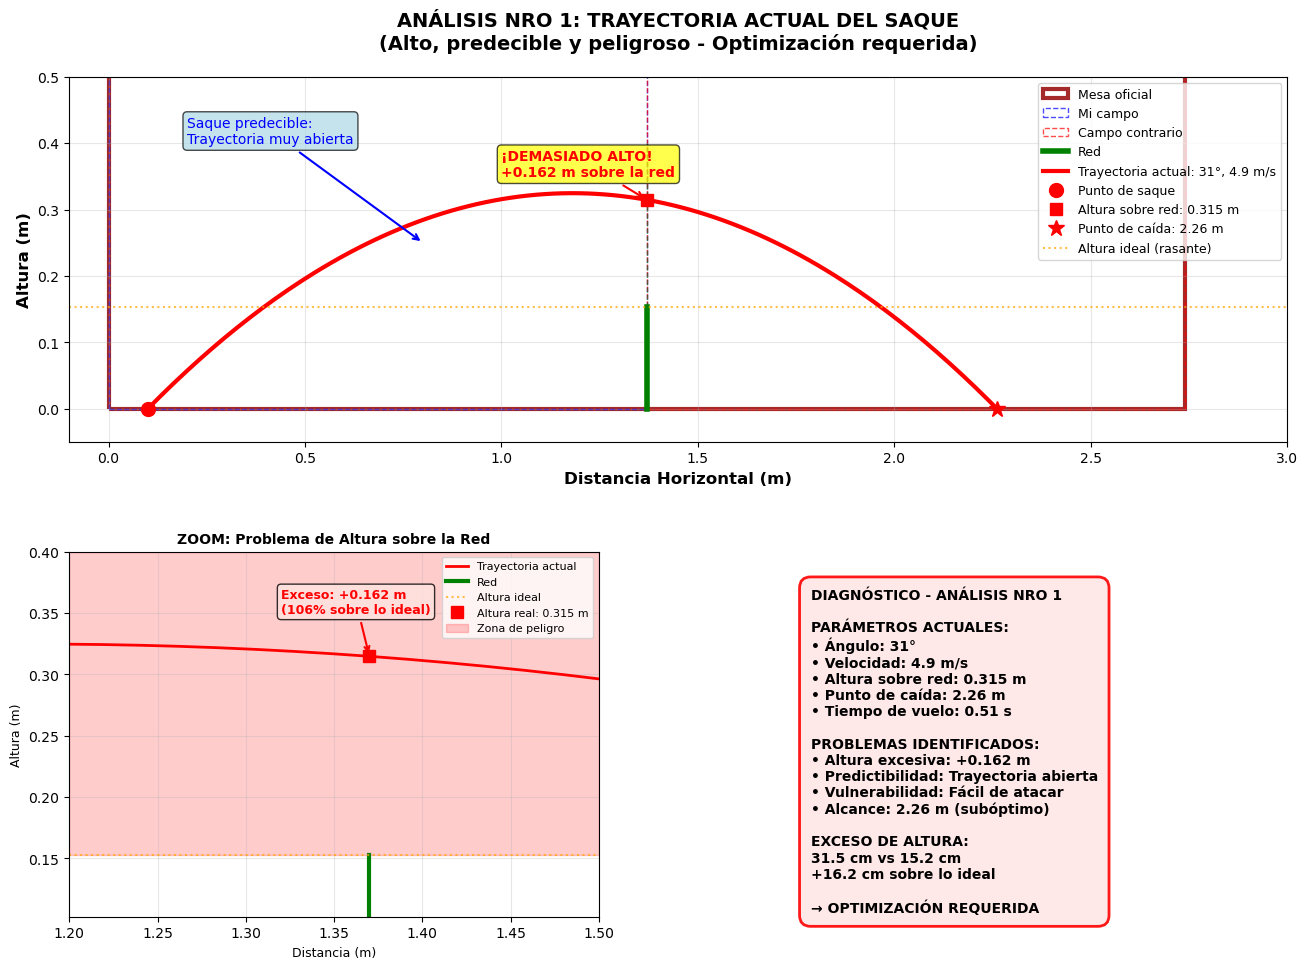

ANÁLISIS NRO 1: DIAGNÓSTICO DEL SAQUE ACTUAL
Ángulo de saque: 31°
Velocidad inicial: 4.9 m/s
Altura al pasar sobre la red: 0.315 m
Altura de la red: 0.1525 m
Exceso de altura: +0.162 m (16.2 cm)
Porcentaje de exceso: 106%
Punto de caída en mesa contraria: 2.26 m
Tiempo total de vuelo: 0.51 s

PROBLEMAS IDENTIFICADOS:
• ALTURA EXCESIVA: La pelota pasa a 0.162 m sobre la red
• PREDICTIBILIDAD: Trayectoria muy abierta y fácil de leer
• VULNERABILIDAD: Saque fácil de atacar por el oponente
• ALCANCE SUBÓPTIMO: No aprovecha 0.38 m de mesa disponible

CONCLUSIÓN: Se requiere optimización de parámetros
Objetivos: Reducir altura sobre red + Maximizar alcance


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
fig = plt.figure(figsize=(14, 10))

# CONSTANTES FÍSICAS Y GEOMÉTRICAS
g = 9.81  # m/s² - aceleración gravitatoria
x0 = 0.1  # m - posición inicial del saque
y0 = 0.0  # m - altura inicial (sobre la mesa)
red_x = 1.37  # m - posición de la red
red_y = 0.1525  # m - altura de la red
mesa_largo = 2.74  # m - largo total de la mesa
mesa_ancho = 1.525  # m - ancho de la mesa

# PARÁMETROS DEL SAQUE ACTUAL
theta_actual = 31  # grados - ángulo inicial
v0_actual = 4.9  # m/s - velocidad inicial

# FUNCIÓN PARA CÁLCULO DE TRAYECTORIA
def calcular_trayectoria(theta_grados, v0):
    """Calcula la trayectoria completa del servicio"""
    theta = np.radians(theta_grados)
    
    # Componentes de velocidad inicial
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    # Tiempo total de vuelo (cuando y = 0)
    t_total = (vy + np.sqrt(vy**2 + 2*g*y0)) / g
    
    # Generar puntos de la trayectoria
    t = np.linspace(0, t_total, 200)
    x = x0 + vx * t
    y = y0 + vy * t - 0.5 * g * t**2
    
    # Calcular altura exacta sobre la red
    t_red = (red_x - x0) / vx
    y_red = y0 + vy * t_red - 0.5 * g * t_red**2
    
    return x, y, t_total, y_red

# Calcular trayectoria actual
x_act, y_act, t_total_act, y_red_act = calcular_trayectoria(theta_actual, v0_actual)

# CREAR SUBPLOTS PRINCIPALES
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # Gráfico principal
ax2 = plt.subplot2grid((2, 2), (1, 0))             # Zoom del problema
ax3 = plt.subplot2grid((2, 2), (1, 1))             # Cuadro de diagnóstico

# ===== GRÁFICO PRINCIPAL =====
# DIBUJAR LA MESA DE TENIS DE MESA
ax1.add_patch(plt.Rectangle((0, 0), mesa_largo, mesa_ancho, 
                           fill=False, edgecolor='brown', 
                           linewidth=3, label='Mesa oficial'))

# Mitades de la mesa (campo propio y contrario)
ax1.add_patch(plt.Rectangle((0, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='blue', 
                           linewidth=1, linestyle='--', alpha=0.7,
                           label='Mi campo'))
ax1.add_patch(plt.Rectangle((red_x, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='red', 
                           linewidth=1, linestyle='--', alpha=0.7,
                           label='Campo contrario'))

# DIBUJAR LA RED
ax1.plot([red_x, red_x], [0, red_y], 'g-', linewidth=4, label='Red')
ax1.plot([red_x, red_x], [red_y, 0.4], 'g--', alpha=0.5, linewidth=1)

# DIBUJAR LA TRAYECTORIA ACTUAL
ax1.plot(x_act, y_act, 'r-', linewidth=3, 
         label=f'Trayectoria actual: {theta_actual}°, {v0_actual} m/s')

# MARCAR PUNTOS IMPORTANTES
# Punto de inicio del saque
ax1.plot([x0], [y0], 'ro', markersize=10, label='Punto de saque')

# Punto sobre la red
ax1.plot([red_x], [y_red_act], 'rs', markersize=8, 
         label=f'Altura sobre red: {y_red_act:.3f} m')

# Punto de caída en mesa contraria
x_caida = x_act[-1]
ax1.plot([x_caida], [0], 'r*', markersize=12, 
         label=f'Punto de caída: {x_caida:.2f} m')

# LÍNEA DE REFERENCIA - ALTURA MÁXIMA PERMITIDA
ax1.axhline(y=red_y, color='orange', linestyle=':', alpha=0.7, 
           label='Altura ideal (rasante)')

# CONFIGURACIÓN DEL GRÁFICO PRINCIPAL
ax1.set_xlabel('Distancia Horizontal (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Altura (m)', fontsize=12, fontweight='bold')
ax1.set_title('ANÁLISIS NRO 1: TRAYECTORIA ACTUAL DEL SAQUE\n' +
              '(Alto, predecible y peligroso - Optimización requerida)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=9)
ax1.set_xlim(-0.1, 3.0)
ax1.set_ylim(-0.05, 0.5)

# ANOTACIONES EXPLICATIVAS EN GRÁFICO PRINCIPAL
ax1.annotate(f'¡DEMASIADO ALTO!\n+{y_red_act-red_y:.3f} m sobre la red', 
             xy=(red_x, y_red_act), xytext=(1.0, 0.35),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax1.annotate('Saque predecible:\nTrayectoria muy abierta', 
             xy=(0.8, 0.25), xytext=(0.2, 0.4),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=10, color='blue',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# ===== ZOOM DEL PROBLEMA =====
ax2.plot(x_act, y_act, 'r-', linewidth=2, label='Trayectoria actual')
ax2.plot([red_x, red_x], [0, red_y], 'g-', linewidth=3, label='Red')
ax2.axhline(y=red_y, color='orange', linestyle=':', alpha=0.7, label='Altura ideal')
ax2.plot([red_x], [y_red_act], 'rs', markersize=8, label=f'Altura real: {y_red_act:.3f} m')

# Zona de peligro (área sobre la red)
ax2.fill_between([1.2, 1.5], red_y, 0.4, color='red', alpha=0.2, label='Zona de peligro')

ax2.set_xlim(1.2, 1.5)
ax2.set_ylim(red_y-0.05, 0.4)
ax2.set_title('ZOOM: Problema de Altura sobre la Red', fontsize=10, fontweight='bold')
ax2.set_xlabel('Distancia (m)', fontsize=9)
ax2.set_ylabel('Altura (m)', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=8)

# Anotación en el zoom
ax2.annotate(f'Exceso: +{y_red_act-red_y:.3f} m\n({((y_red_act-red_y)/red_y*100):.0f}% sobre lo ideal)', 
             xy=(red_x, y_red_act), xytext=(1.32, 0.35),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="mistyrose", alpha=0.8))

# ===== CUADRO DE DIAGNÓSTICO =====
ax3.axis('off')
diagnostico_text = (f'DIAGNÓSTICO - ANÁLISIS NRO 1\n\n'
                   f'PARÁMETROS ACTUALES:\n'
                   f'• Ángulo: {theta_actual}°\n'
                   f'• Velocidad: {v0_actual} m/s\n'
                   f'• Altura sobre red: {y_red_act:.3f} m\n'
                   f'• Punto de caída: {x_caida:.2f} m\n'
                   f'• Tiempo de vuelo: {t_total_act:.2f} s\n\n'
                   f'PROBLEMAS IDENTIFICADOS:\n'
                   f'• Altura excesiva: +{y_red_act-red_y:.3f} m\n'
                   f'• Predictibilidad: Trayectoria abierta\n'
                   f'• Vulnerabilidad: Fácil de atacar\n'
                   f'• Alcance: {x_caida:.2f} m (subóptimo)\n\n'
                   f'EXCESO DE ALTURA:\n'
                   f'{y_red_act*100:.1f} cm vs {red_y*100:.1f} cm\n'
                   f'+{(y_red_act-red_y)*100:.1f} cm sobre lo ideal\n\n'
                   f'→ OPTIMIZACIÓN REQUERIDA')

ax3.text(0.1, 0.9, diagnostico_text, fontsize=10, 
         verticalalignment='top', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.8", facecolor="#FFE6E6", alpha=0.9,
                  edgecolor='red', linewidth=2))

# AJUSTAR ESPACIADO
plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.92, 
                    hspace=0.3, wspace=0.3)

plt.show()

# IMPRIMIR ANÁLISIS EN CONSOLA
print("="*70)
print("ANÁLISIS NRO 1: DIAGNÓSTICO DEL SAQUE ACTUAL")
print("="*70)
print(f"Ángulo de saque: {theta_actual}°")
print(f"Velocidad inicial: {v0_actual} m/s")
print(f"Altura al pasar sobre la red: {y_red_act:.3f} m")
print(f"Altura de la red: {red_y} m")
print(f"Exceso de altura: +{y_red_act-red_y:.3f} m ({(y_red_act-red_y)*100:.1f} cm)")
print(f"Porcentaje de exceso: {((y_red_act-red_y)/red_y*100):.0f}%")
print(f"Punto de caída en mesa contraria: {x_caida:.2f} m")
print(f"Tiempo total de vuelo: {t_total_act:.2f} s")

print("\nPROBLEMAS IDENTIFICADOS:")
print(f"• ALTURA EXCESIVA: La pelota pasa a {y_red_act-red_y:.3f} m sobre la red")
print("• PREDICTIBILIDAD: Trayectoria muy abierta y fácil de leer")
print("• VULNERABILIDAD: Saque fácil de atacar por el oponente")
print(f"• ALCANCE SUBÓPTIMO: No aprovecha {mesa_largo-x0-x_caida:.2f} m de mesa disponible")

print("\nCONCLUSIÓN: Se requiere optimización de parámetros")
print("Objetivos: Reducir altura sobre red + Maximizar alcance")
print("="*70)